# Laptop Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('laptop_data.csv')
df
# Read file and stode data into df

,No.,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
df.shape 
# Shape of dataframe

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No.               1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Data Featuring

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

No.                 0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df['Company'].unique()
# Uniques of Column Company 

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [9]:
df['TypeName'].unique()
# Uniques of Column Type name

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [10]:
df['Inches'].describe()

count    1303.000000
mean       15.017191
std         1.426304
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: Inches, dtype: float64

In [11]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [12]:
df['resolution'] =  df['ScreenResolution'].str.split(' ').apply(lambda x:x[-1])
# Store Proper Resolution 
df['Width_resolution'] = df['resolution'].str.split('x').str.get(0).astype('Int64')
df['Height_resolution'] = df['resolution'].str.split('x').str.get(1).astype('Int64')
# Width and hight na resolution ne alg alg kri int ma convert
df[['ScreenResolution','resolution','Width_resolution','Height_resolution']].head(10)

,ScreenResolution,resolution,Width_resolution,Height_resolution
0,IPS Panel Retina Display 2560x1600,2560x1600,2560,1600
1,1440x900,1440x900,1440,900
2,Full HD 1920x1080,1920x1080,1920,1080
3,IPS Panel Retina Display 2880x1800,2880x1800,2880,1800
4,IPS Panel Retina Display 2560x1600,2560x1600,2560,1600
5,1366x768,1366x768,1366,768
6,IPS Panel Retina Display 2880x1800,2880x1800,2880,1800
7,1440x900,1440x900,1440,900
8,Full HD 1920x1080,1920x1080,1920,1080
9,IPS Panel Full HD 1920x1080,1920x1080,1920,1080


In [13]:
df['PPI'] = ((df['Width_resolution']**2 + df['Height_resolution']**2).apply(np.sqrt))/df['Inches']
# Fint Pixel Per Inch
df[['Width_resolution','Height_resolution','Inches','PPI']]

,Width_resolution,Height_resolution,Inches,PPI
0,2560,1600,13.3,226.983005
1,1440,900,13.3,127.67794
2,1920,1080,15.6,141.211998
3,2880,1800,15.4,220.534624
4,2560,1600,13.3,226.983005
...,...,...,...,...
1298,1920,1080,14.0,157.350512
1299,3200,1800,13.3,276.05353
1300,1366,768,14.0,111.935204
1301,1366,768,15.6,100.45467


In [14]:
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)
df['Touch screen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Full HD'] = df['ScreenResolution'].apply(lambda x:1 if 'Full HD' in x else 0)
df['Quad HD+'] = df['ScreenResolution'].apply(lambda x:1 if 'Quad HD+' in x else 0)
df['4K Ultra HD'] = df['ScreenResolution'].apply(lambda x:1 if '4K Ultra HD' in x else 0)
# Secreen Resolution data ne alg alg comlumn ma devide 
df[['ScreenResolution','IPS Panel','Touch screen','Full HD','Quad HD+','4K Ultra HD']].head(10)

,ScreenResolution,IPS Panel,Touch screen,Full HD,Quad HD+,4K Ultra HD
0,IPS Panel Retina Display 2560x1600,1,0,0,0,0
1,1440x900,0,0,0,0,0
2,Full HD 1920x1080,0,0,1,0,0
3,IPS Panel Retina Display 2880x1800,1,0,0,0,0
4,IPS Panel Retina Display 2560x1600,1,0,0,0,0
5,1366x768,0,0,0,0,0
6,IPS Panel Retina Display 2880x1800,1,0,0,0,0
7,1440x900,0,0,0,0,0
8,Full HD 1920x1080,0,0,1,0,0
9,IPS Panel Full HD 1920x1080,1,0,1,0,0


In [15]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [16]:
df['Cpu_new'] = df['Cpu'].str.split(' ').str.slice(0,3).str.join(' ')
# Remove Unnessesoy Information
df[['Cpu','Cpu_new']]

,Cpu,Cpu_new
0,Intel Core i5 2.3GHz,Intel Core i5
1,Intel Core i5 1.8GHz,Intel Core i5
2,Intel Core i5 7200U 2.5GHz,Intel Core i5
3,Intel Core i7 2.7GHz,Intel Core i7
4,Intel Core i5 3.1GHz,Intel Core i5
...,...,...
1298,Intel Core i7 6500U 2.5GHz,Intel Core i7
1299,Intel Core i7 6500U 2.5GHz,Intel Core i7
1300,Intel Celeron Dual Core N3050 1.6GHz,Intel Celeron Dual
1301,Intel Core i7 6500U 2.5GHz,Intel Core i7


In [17]:
df['Intel Core i3'] = df['Cpu_new'].apply(lambda x:1 if 'Intel Core i3' in x else 0)
df['Intel Core i5'] = df['Cpu_new'].apply(lambda x:1 if 'Intel Core i5' in x else 0)
df['Intel Core i7'] = df['Cpu_new'].apply(lambda x:1 if 'Intel Core i7' in x else 0)
df['AMD Prossesor'] = df['Cpu_new'].apply(lambda x:1 if 'AMD' in x else 0)
def Check_prossesor(x):
    if 'Intel Core' not in x and 'AMD' not in x:
        return 1
    else:
        return 0
df['Intel Onther prossesor'] = df['Cpu'].apply(Check_prossesor)
# Cpu wadi column ne destribute kri
df[['Cpu_new','Intel Core i3','Intel Core i5','Intel Core i7','Intel Onther prossesor','AMD Prossesor']].head(10)

,Cpu_new,Intel Core i3,Intel Core i5,Intel Core i7,Intel Onther prossesor,AMD Prossesor
0,Intel Core i5,0,1,0,0,0
1,Intel Core i5,0,1,0,0,0
2,Intel Core i5,0,1,0,0,0
3,Intel Core i7,0,0,1,0,0
4,Intel Core i5,0,1,0,0,0
5,AMD A9-Series 9420,0,0,0,0,1
6,Intel Core i7,0,0,1,0,0
7,Intel Core i5,0,1,0,0,0
8,Intel Core i7,0,0,1,0,0
9,Intel Core i5,0,1,0,0,0


In [18]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [19]:
df['Ram(GB)'] = df['Ram'].str.replace('GB','').astype('Int64') 
# data ne int formate ma convert 
df[['Ram','Ram(GB)']].head()

,Ram,Ram(GB)
0,8GB,8
1,8GB,8
2,8GB,8
3,16GB,16
4,8GB,8


In [20]:
df['Weight'].head(10)

0    1.37kg
1    1.34kg
2    1.86kg
3    1.83kg
4    1.37kg
5     2.1kg
6    2.04kg
7    1.34kg
8     1.3kg
9     1.6kg
Name: Weight, dtype: object

In [21]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [22]:
df['Gpu'] = df['Gpu'].str.split().str.get(0)
# Get only First Name Of Graphics

In [23]:
df['Weight(kg)'] = df['Weight'].str.replace('kg','').astype('float64')
# data ne Numeric formate ma convert 
df[['Weight','Weight(kg)']]

,Weight,Weight(kg)
0,1.37kg,1.37
1,1.34kg,1.34
2,1.86kg,1.86
3,1.83kg,1.83
4,1.37kg,1.37
...,...,...
1298,1.8kg,1.80
1299,1.3kg,1.30
1300,1.5kg,1.50
1301,2.19kg,2.19


In [24]:
def convers(x):
    print(x)
    t = ''
    temp = []
    for i in x:
        if 'TB' in i.split()[0] :
            k = str(float(i.split()[0].replace('TB',''))*1024) + ' ' + ' '.join(i.split()[1:])
        else:
            k = i.replace('GB','')
        temp.append(k)
    return temp
df['Memory_GB'] =  df['Memory'].str.split('+').apply(convers).str.join(' / ')
# Convert TB into GB and remove Unit(like GB)
df[['Memory','Memory_GB']].head(10)

['128GB SSD']
['128GB Flash Storage']
['256GB SSD']
['512GB SSD']
['256GB SSD']
['500GB HDD']
['256GB Flash Storage']
['256GB Flash Storage']
['512GB SSD']
['256GB SSD']
['500GB HDD']
['500GB HDD']
['256GB SSD']
['256GB SSD']
['256GB SSD']
['256GB SSD']
['256GB SSD']
['512GB SSD']
['1TB HDD']
['128GB SSD']
['32GB Flash Storage']
['128GB SSD ', '  1TB HDD']
['500GB HDD']
['256GB SSD']
['256GB SSD']
['1TB HDD']
['128GB Flash Storage']
['256GB SSD']
['256GB SSD ', '  256GB SSD']
['1TB HDD']
['64GB Flash Storage']
['32GB Flash Storage']
['500GB HDD']
['512GB SSD']
['256GB Flash Storage']
['64GB Flash Storage']
['1TB HDD']
['128GB SSD ', '  1TB HDD']
['1TB HDD']
['256GB SSD']
['1TB HDD']
['256GB SSD ', '  1TB HDD']
['1TB HDD']
['256GB SSD']
['1TB HDD']
['256GB SSD']
['128GB SSD']
['256GB SSD ', '  1TB HDD']
['256GB SSD']
['1TB HDD']
['64GB Flash Storage']
['256GB SSD']
['256GB SSD']
['512GB SSD']
['1TB HDD']
['256GB SSD']
['128GB SSD']
['256GB SSD']
['256GB SSD ', '  2TB HDD']
['256GB SSD']

,Memory,Memory_GB
0,128GB SSD,128 SSD
1,128GB Flash Storage,128 Flash Storage
2,256GB SSD,256 SSD
3,512GB SSD,512 SSD
4,256GB SSD,256 SSD
5,500GB HDD,500 HDD
6,256GB Flash Storage,256 Flash Storage
7,256GB Flash Storage,256 Flash Storage
8,512GB SSD,512 SSD
9,256GB SSD,256 SSD


In [25]:
def SSD_M(x):
    if 'SSD' in x :
        for i in x.split('/'):
            if 'SSD' in i :
                return round(float(i.split()[0]))
    else :
            return 0
df['SSD'] = df['Memory_GB'].apply(SSD_M).astype('Int64')
def HDD_M(x):
    if 'HDD' in x :
        for i in x.split('/'):
            if 'HDD' in i :
                return round(float(i.split()[0]))
    else :
            return 0
df['HDD'] = df['Memory_GB'].apply(HDD_M).astype('Int64')
def FS_M(x):
    if 'Flash Storage' in x :
        for i in x.split('/'):
            if 'Flash Storage' in i :
                return round(float(i.split()[0]))
    else :
            return 0
df['Flash Storage'] = df['Memory_GB'].apply(FS_M).astype('Int64')
def HB_M(x):
    if 'Hybrid' in x :
        for i in x.split('/'):
            if 'Hybrid' in i :
                return round(float(i.split()[0]))
    else :
            return 0
df['Hybrid'] = df['Memory_GB'].apply(HB_M).astype('Int64')
# Destribute Memory Column
df[['Memory','SSD','HDD','Flash Storage','Hybrid']].head(10)

,Memory,SSD,HDD,Flash Storage,Hybrid
0,128GB SSD,128,0,0,0
1,128GB Flash Storage,0,0,128,0
2,256GB SSD,256,0,0,0
3,512GB SSD,512,0,0,0
4,256GB SSD,256,0,0,0
5,500GB HDD,0,500,0,0
6,256GB Flash Storage,0,0,256,0
7,256GB Flash Storage,0,0,256,0
8,512GB SSD,512,0,0,0
9,256GB SSD,256,0,0,0


In [26]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [27]:
df['Windows_OS'] = df['OpSys'].apply(lambda x:1 if 'Windows' in x else 0)
df['Chrome_OS'] = df['OpSys'].apply(lambda x:1 if 'Chrome' in x else 0)
df['Linux'] = df['OpSys'].apply(lambda x:1 if 'Linux' in x else 0)
df['Mac_OS'] = df['OpSys'].apply(lambda x: 1 if 'mac' in x.lower() else 0)
# Destribute Operating System
df[['OpSys','Windows_OS','Chrome_OS','Linux','Mac_OS']]

,OpSys,Windows_OS,Chrome_OS,Linux,Mac_OS
0,macOS,0,0,0,1
1,macOS,0,0,0,1
2,No OS,0,0,0,0
3,macOS,0,0,0,1
4,macOS,0,0,0,1
...,...,...,...,...,...
1298,Windows 10,1,0,0,0
1299,Windows 10,1,0,0,0
1300,Windows 10,1,0,0,0
1301,Windows 10,1,0,0,0


In [28]:
df

,No.,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Weight(kg),Memory_GB,SSD,HDD,Flash Storage,Hybrid,Windows_OS,Chrome_OS,Linux,Mac_OS
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel,macOS,...,1.37,128 SSD,128,0,0,0,0,0,0,1
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel,macOS,...,1.34,128 Flash Storage,0,0,128,0,0,0,0,1
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel,No OS,...,1.86,256 SSD,256,0,0,0,0,0,0,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD,macOS,...,1.83,512 SSD,512,0,0,0,0,0,0,1
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel,macOS,...,1.37,256 SSD,256,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel,Windows 10,...,1.80,128 SSD,128,0,0,0,1,0,0,0
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel,Windows 10,...,1.30,512 SSD,512,0,0,0,1,0,0,0
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel,Windows 10,...,1.50,64 Flash Storage,0,0,64,0,1,0,0,0
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD,Windows 10,...,2.19,1024.0 HDD,0,1024,0,0,1,0,0,0


In [29]:
df.drop(columns=['ScreenResolution','Cpu','Ram','Memory','Weight','resolution','Cpu_new','Memory_GB','OpSys','Width_resolution','Height_resolution','Inches'],inplace=True)
# Drop unnassesory Column

### Data Cleaning

In [30]:
df.describe()

,No.,Price,PPI,IPS Panel,Touch screen,Full HD,Quad HD+,4K Ultra HD,Intel Core i3,Intel Core i5,...,Ram(GB),Weight(kg),SSD,HDD,Flash Storage,Hybrid,Windows_OS,Chrome_OS,Linux,Mac_OS
count,1303.00000,1303.000000,1303.0,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,...,1303.0,1303.000000,1303.0,1303.0,1303.0,1303.0,1303.000000,1303.000000,1303.000000,1303.000000
mean,651.00000,59870.042910,146.635987,0.280123,0.147352,0.646969,0.023024,0.033001,0.104375,0.324635,...,8.382195,2.038734,183.04528,421.691481,4.555641,9.034536,0.863392,0.020721,0.047583,0.016117
std,376.28801,37243.201786,43.121345,0.449231,0.354593,0.478096,0.150037,0.178707,0.305863,0.468418,...,5.084665,0.665475,186.140451,526.34447,30.27409,94.73889,0.343565,0.142505,0.212963,0.125973
min,0.00000,9270.720000,90.583402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.0,0.690000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,325.50000,31914.720000,127.335675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.0,1.500000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000
50%,651.00000,52054.560000,141.211998,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,8.0,2.040000,256.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000
75%,976.50000,79274.246400,157.350512,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,8.0,2.300000,256.0,1024.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000
max,1302.00000,324954.720000,352.465147,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,64.0,4.700000,1024.0,2048.0,512.0,1024.0,1.000000,1.000000,1.000000,1.000000


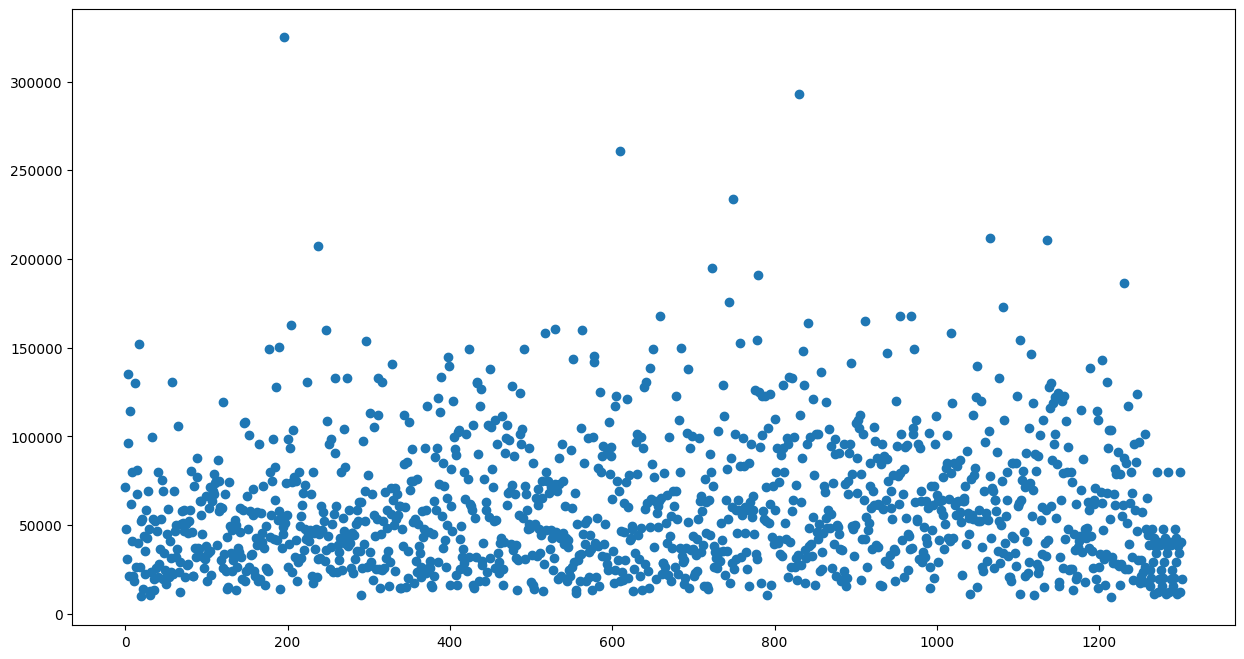

In [31]:
plt.figure(figsize=(15,8))
plt.scatter(df['No.'],df['Price'])

In [32]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1
print(q1,q3,iqr)
lower_limit = q1 - (iqr*1.5)
upper_limit = q3 + (iqr*1.5)
print(lower_limit,upper_limit)
df['Price'] = df['Price'].apply(lambda x:x if x<=upper_limit else upper_limit)
df['Price']

31914.72 79274.2464 47359.5264
-39124.5696 150313.53600000002


0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

### Machine Learning Model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [34]:
X = df[['Company','TypeName','PPI','Gpu','IPS Panel','Touch screen','Full HD','Quad HD+','4K Ultra HD','Intel Core i3','Intel Core i5','Intel Core i7','AMD Prossesor','Intel Onther prossesor','Ram(GB)','Weight(kg)','SSD','HDD','Flash Storage','Hybrid','Windows_OS','Chrome_OS','Linux','Mac_OS']]
Y = df[['Price']]

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=34)

In [36]:
ohe = OneHotEncoder()
ohe.fit(X[['Company','TypeName','Gpu']])

OneHotEncoder()

In [37]:
column_tranfer = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company','TypeName','Gpu']),remainder='passthrough')

In [38]:
column_tranfer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
                                                           array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
       'Workstation'], dtype=object),
                                                           array(['AMD', 'ARM', 'Intel', 'Nvidia'], dtype=object)]),
                                 ['Company', 'TypeName', 'Gpu'])])

In [39]:
lr = LinearRegression()

In [40]:
pipe = make_pipeline(column_tranfer,lr)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
                                                                            array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
       'Workstation'], dtype=object),
                                                                            array(['AMD', 'ARM', 'Intel', 'Nvidia'], dtype=object)]),
                                                  ['Company', 'TypeName',
                                                   'Gpu'])])),
                ('linearregression', LinearRegression())])

In [41]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
                                                                            array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
       'Workstation'], dtype=object),
                                                                            array(['AMD', 'ARM', 'Intel', 'Nvidia'], dtype=object)]),
                                                  ['Company', 'TypeName',
                                                   'Gpu'])])),
                ('linearregression', LinearRegression())])

In [42]:
y_pred = pipe.predict(x_test)

In [43]:
r2_score(y_test,y_pred)

0.7601052706996314